In [28]:
import pandas as pd

# Tạo một DataFrame ví dụ
data = {'A': [9, 2, 1, 7],
        'B': [8, 7, 6, 5],
        'C': [12, 11, 10, 3]}

df = pd.DataFrame(data)
print(df)

df = df[df.iloc[3].sort_values().index]


print(df)

   A  B   C
0  9  8  12
1  2  7  11
2  1  6  10
3  7  5   3
    C  B  A
0  12  8  9
1  11  7  2
2  10  6  1
3   3  5  7


In [40]:
import pandas as pd

# docs = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))['data']
# print(len(docs))
data_1 = pd.read_csv('./data_test/vnexpress-thoisu.csv')

data_2 = pd.read_csv('./data_test/vnexpress-thoisu-20.csv')

papers = pd.concat([data_1, data_2], ignore_index=True)
papers = papers.drop(columns=['description'], axis=1)
papers.rename(columns={'body': 'paper_text'}, inplace=True)
# convert type of column
papers['paper_text'].astype(str)
# Print head
print(papers.head())
print(papers.shape)

                                               title  \
0  Cao tốc Cần Thơ - Cà Mau có thêm nửa triệu m3 ...   
1  Thủ tướng trao Huân chương Hữu nghị cho bà Aur...   
2  Phà chở 15.000 lượt người mỗi ngày ở miền Tây ...   
3  Giám đốc Công an Hà Nội: Loại nhà nào cũng phả...   
4          Hàng loạt cây rừng bị đầu độc - VnExpress   

                                          paper_text  \
0  Đây là tỉnh đầu tiên bàn giao mỏ cát cho nhà t...   
1  Lãnh đạo Chính phủ Việt Nam trao huân chương c...   
2  Công văn yêu cầu chấm dứt hoạt động bến phà An...   
3  Chiều 20/9, tại cuộc tiếp xúc cử tri quận Tây ...   
4  Ban quản lý rừng phòng hộ đầu nguồn liên hồ Sô...   

                                  date  
0   Thứ tư, 20/9/2023, 18:49 (GMT+7)\n  
1  Thứ năm, 21/9/2023, 01:29 (GMT+7)\n  
2  Thứ năm, 21/9/2023, 00:00 (GMT+7)\n  
3   Thứ tư, 20/9/2023, 22:11 (GMT+7)\n  
4   Thứ tư, 20/9/2023, 19:04 (GMT+7)\n  
(1222, 3)


In [41]:
import numpy as np
# duplicated
print(papers.duplicated().sum())
papers.drop_duplicates(inplace=True)

# drop nan
papers.dropna(axis=0, inplace=True, how="any")
# drop inf
papers.replace([np.inf, -np.inf], np.nan, inplace=True)
papers.replace('', np.nan, inplace=True)
papers.dropna(inplace=True,how='any',axis=0)
# Remove the columns
try:
    papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
except:
    pass

# Print out the first rows of papers
print(papers.head())
print(papers.info())

564
                                               title  \
0  Cao tốc Cần Thơ - Cà Mau có thêm nửa triệu m3 ...   
1  Thủ tướng trao Huân chương Hữu nghị cho bà Aur...   
2  Phà chở 15.000 lượt người mỗi ngày ở miền Tây ...   
3  Giám đốc Công an Hà Nội: Loại nhà nào cũng phả...   
4          Hàng loạt cây rừng bị đầu độc - VnExpress   

                                          paper_text  \
0  Đây là tỉnh đầu tiên bàn giao mỏ cát cho nhà t...   
1  Lãnh đạo Chính phủ Việt Nam trao huân chương c...   
2  Công văn yêu cầu chấm dứt hoạt động bến phà An...   
3  Chiều 20/9, tại cuộc tiếp xúc cử tri quận Tây ...   
4  Ban quản lý rừng phòng hộ đầu nguồn liên hồ Sô...   

                                  date  
0   Thứ tư, 20/9/2023, 18:49 (GMT+7)\n  
1  Thứ năm, 21/9/2023, 01:29 (GMT+7)\n  
2  Thứ năm, 21/9/2023, 00:00 (GMT+7)\n  
3   Thứ tư, 20/9/2023, 22:11 (GMT+7)\n  
4   Thứ tư, 20/9/2023, 19:04 (GMT+7)\n  
<class 'pandas.core.frame.DataFrame'>
Index: 603 entries, 0 to 1216
Data col

### get timestamps for visualization

In [84]:
# get timestamps
timestamps = papers.date.to_list()

In [43]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

0    đây là tỉnh đầu tiên bàn giao mỏ cát cho nhà t...
1    lãnh đạo chính phủ việt nam trao huân chương c...
2    công văn yêu cầu chấm dứt hoạt động bến phà an...
3    chiều 20/9 tại cuộc tiếp xúc cử tri quận tây h...
4    ban quản lý rừng phòng hộ đầu nguồn liên hồ sô...
Name: paper_text_processed, dtype: object

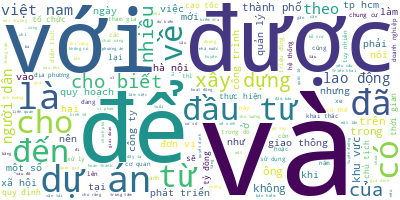

In [44]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [45]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode
import string
import re
import pyvi
from pyvi import ViTokenizer, ViPosTagger
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
stop_words = set(open("./data_test/vietnamese-stopwords-dash.txt", "r", encoding="utf-8").read().splitlines())

def remove_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

def remove_number(text):
    return re.sub(r'\d+', '', text).strip()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_punctuation_not_underscore(text): # remove dấu câu để lại dấu _
    # Tạo một bản sao của string.punctuation và loại bỏ dấu _
    punctuation = string.punctuation.replace("_", "")
    # Sử dụng str.maketrans và translate để loại bỏ dấu câu
    return text.translate(str.maketrans('', '', punctuation))

def remove_(text):
    text = remove_punctuation_not_underscore(text)
    text = remove_number(text)
    return re.sub(r'“|”', '', text).strip()
    # return ''.join(char for char in text if char not in ['“', '”'])

def remove_punctuation_underscore(text): # remove dấu _
    punctuation = "_"
    return text.translate(str.maketrans('', '', punctuation))
    
def word_to_phrase(text): # chuyển từ thành cụm từ
    return ViTokenizer.tokenize(text) 

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        # loại bỏ dấu câu and split
        yield([remove_(str(word)) for word in re.findall(r'\w+|\S+', word_to_phrase(remove_punctuation_underscore(str(sentence)))) if remove_(str(word)) != ''])

def remove_stopwords(texts):
    words = [word for word in texts.split() if word not in stop_words]
    words_to_sentence = ' '.join(words)
    return words_to_sentence.strip()

data = papers['paper_text_processed'].apply(lambda x: remove_whitespace(x))
data = data.apply(lambda x: remove_number(x))
data = data.apply(lambda x: remove_punctuation_underscore(x))
data = data.apply(lambda x: word_to_phrase(x))
data = data.apply(lambda x: remove_(x))
data = data.apply(lambda x: remove_stopwords(x))
# text = data[0]
# print(text)
# print(remove_stopwords(text))
docs = data.tolist()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/minhthuy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/minhthuy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Embedding

In [46]:
# from sentence_transformers import SentenceTransformer
# sentence_model = SentenceTransformer("keepitreal/vietnamese-sbert")
# embeddings = sentence_model.encode(docs, show_progress_bar=False)

### Training model with bertopic
#### Parameters
##### BERTopic

- language: Ngôn ngữ, ở đây là vietnamese
- top_n_words: số lượng từ được sử dụng để mô tả mỗi chủ đề
- n_gram_range: số lượng từ trong một n-gram
- min_topic_size: số lượng tài liệu tối thiểu trong mỗi chủ đề
- nr_topics: số lượng topic cần phát hiện. Nếu không được chỉ định, BERTopic sẽ tìm kiếm tất cả các chủ đề có thể có. Nếu Bertopic tìm thấy 100 chủ đề mà nr_topics=10 thì nó sẽ cố gắng đưa về 10 chủ đề.
- low_memory: sử dụng low memory mode để sử dụng ít bộ nhớ hơn
- calculate_probabilities: tính xác suất của từng từ trong topic
##### UMAP: 
UMAP là một kỹ thuật tuyệt vời để giảm kích thước. Trong BERTopic, nó được sử dụng để giảm tính chiều của việc nhúng tài liệu vào thứ gì đó dễ sử dụng hơn với HDBSCAN để tạo các cụm tốt. Tuy nhiên, nó có một số lượng đáng kể các tham số mà bạn có thể tính đến. Vì việc hiển thị tất cả các tham số trong BERTopic sẽ khó quản lý nên chúng ta có thể khởi tạo mô hình UMAP của mình và chuyển nó sang BERTopic:
```md
from umap import UMAP

umap_model = UMAP(n_neighbors=15, n_components=10, metric='cosine', low_memory=False)
topic_model = BERTopic(umap_model=umap_model).fit(docs)
```
- n_neighbors: 
- n_components: số chiều của embedding vector sau khi giảm chiều bằng UMAP
- metric: độ đo khoảng cách giữa các điểm dữ liệu trong không gian vector embedding (có thể là cosine, euclidean, manhattan, chebyshev, minkowski, canberra, braycurtis, mahalanobis, wminkowski, seuclidean, cosine, correlation, haversine, hamming, jaccard, dice, russellrao, kulsinski, rogerstanimoto, sokalmichener, sokalsneath, yule, or matching)
- low_memory: low_memory được sử dụng khi tập dữ liệu có thể tiêu tốn nhiều bộ nhớ. Việc sử dụng hàng triệu tài liệu có thể dẫn đến các vấn đề về bộ nhớ và việc đặt giá trị này thành True có thể giảm bớt tiêu hao bộ nhớ.

##### HDBSCAN
Sau khi giảm số chiều của embedding vector, Chúng tôi sử dụng HDBSCAN để phân cụm các tập docs thành các cụm tài liệu tương tự nhau. Tương tự như UMAP, HDBSCAN có nhiều tham số để tuỳ chỉnh:
```md
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=10, metric='euclidean', prediction_data=True)
topic_model = BERTopic(hdbscan_model=hdbscan_model).fit(docs)
```
- min_cluster_size: số lượng tài liệu tối thiểu trong mỗi cụm
- min_samples: số lượng tài liệu tối thiểu trong mỗi cụm
- metric: được sử dụng để tính khoảng cách. Ở đây, chúng tôi đã sử dụng euclide vì sau khi giảm kích thước, chúng tôi có dữ liệu có chiều nhỏ và không cần tối ưu hóa nhiều. Tuy nhiên, nếu tăng n_comComponents trong UMAP thì nên xem xét các số liệu hoạt động với dữ liệu nhiều chiều.
- prediction_data: nếu True thì sẽ trả về các điểm dữ liệu được dự đoán cho mỗi cụm. Điều này có thể được sử dụng để phân tích các cụm và xác định các điểm nhiễu.


In [47]:
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired
from bertopic.vectorizers import ClassTfidfTransformer

# Step 1 - Extract embeddings
embedding_model = SentenceTransformer("keepitreal/vietnamese-sbert")
# Step 2 - Reduce dimensionality
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')
# Step 3 - Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
# Step 4 - Tokenize topics
stop_words = list(stop_words)
vectorizer_model = CountVectorizer(stop_words=stop_words)
# Step 5 - Create topic representation
ctfidf_model = ClassTfidfTransformer()
# Step 6 - (Optional) Fine-tune topic representations with 
# a `bertopic.representation` model
representation_model = KeyBERTInspired()

nr_topics = 10
topic_model = BERTopic(
  embedding_model=embedding_model,          # Step 1 - Extract embeddings
  umap_model=umap_model,                    # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,              # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,        # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,                # Step 5 - Extract topic words
  representation_model=representation_model, # Step 6 - (Optional) Fine-tune topic represenations
  language="vietnamese", calculate_probabilities=True, verbose=True, nr_topics=nr_topics
)
topics, probs = topic_model.fit_transform(docs)

Batches: 100%|██████████| 19/19 [03:28<00:00, 10.96s/it]
2023-09-21 15:49:29,194 - BERTopic - Transformed documents to Embeddings
2023-09-21 15:49:33,163 - BERTopic - Reduced dimensionality
2023-09-21 15:49:33,216 - BERTopic - Clustered reduced embeddings
2023-09-21 15:50:28,594 - BERTopic - Reduced number of topics from 12 to 10


# VISUALIZE TOPIC MODEL

### Visualize Documents

In [48]:
from umap import UMAP
topic_model.visualize_documents(docs)

### Visualize Topic Hierarchy

In [49]:
# hierarchical: phân cấp
topic_model.visualize_hierarchy()

#### Text-based topic tree
- Mặc dù cấu trúc chung khó xem hơn nhưng chúng ta có thể thấy rõ hơn những chủ đề nào có thể được hợp nhất một cách hợp lý

In [50]:
hierarchical_topics = topic_model.hierarchical_topics(docs)
tree = topic_model.get_topic_tree(hierarchical_topics)
print(tree)

100%|██████████| 8/8 [00:24<00:00,  3.02s/it]

.
├─đoạn_hoàn_thành_làn_khu_vực_quốc_lộ
│    ├─■──tổng_thống_sân_bay_nội_việt_nam_viếng ── Topic: 3
│    └─đoạn_làn_hoàn_thành_xây_quốc_lộ
│         ├─rộng_khu_vực_trồng_nuôi_phát_triển
│         │    ├─■──rừng_khô_trồng_sâu_rộng ── Topic: 0
│         │    └─■──không_gian_văn_hóa_kiến_trúc_xây_phát_triển ── Topic: 1
│         └─đoạn_hạng_mục_hoàn_thành_làn_tiến_độ
│              ├─■──đoạn_hoàn_thành_làn_tiến_độ_khởi_công ── Topic: 2
│              └─■──nhà_ga_metro_ga_hoàn_thành_hàng_hóa ── Topic: 7
└─rút_chế_độ_hưu_trí_nghỉ_việc_sửa_đổi
     ├─chữa_cháy_nhà_chung_cư_chung_cư_thoát_xây
     │    ├─nhà_chung_cư_chung_cư_chữa_cháy_thoát_căn_hộ
     │    │    ├─■──xe_tải_chở_tài_xế_ôtô_lái ── Topic: 6
     │    │    └─■──nhà_chung_cư_chung_cư_chữa_cháy_xây_thoát ── Topic: 4
     │    └─■──rửa_vệ_sinh_giáo_dục_sạch_lớp ── Topic: 8
     └─■──rút_hưu_trí_cắt_giảm_tử_tuất_nghỉ ── Topic: 5



### Visualize Hierarchical Documents

In [51]:
# hierarchical_topics = topic_model.hierarchical_topics(docs)

In [52]:
# topic_model.visualize_hierarchical_documents(docs, hierarchical_topics, embeddings=embeddings)

# # Reduce dimensionality of embeddings, this step is optional but much faster to perform iteratively:
# reduced_embeddings = UMAP(n_neighbors=10, n_components=10, min_dist=0.0, metric='cosine').fit_transform(embeddings)
# topic_model.visualize_hierarchical_documents(docs, hierarchical_topics, reduced_embeddings=reduced_embeddings)

### Visualize Terms
- Chúng ta có thể trực quan hóa các từ được chọn cho một số chủ đề bằng cách tạo biểu đồ cột từ điểm c-TF-IDF cho mỗi biểu đồ đại diện chủ đề. Có thể thu thập thông tin từ các điểm c-TF-IDF tương đối giữa các chủ đề và bên trong chúng. Hơn nữa, bạn có thể dễ dàng so sánh các biểu đồ đại diện chủ đề với nhau. Để trực quan hóa cấu trúc này, hãy chạy đoạn mã sau:

In [53]:
topic_model.visualize_barchart()

### Visualize Topic Similarity

In [54]:
topic_model.visualize_heatmap()

### Visualize Term Score Decline

In [55]:
topic_model.visualize_term_rank()

In [56]:
topic_model.visualize_term_rank(log_scale=True)


### Visualize Topics per Class

In [57]:
classes = [i for i in papers["title"]]
topics_per_class = topic_model.topics_per_class(docs, classes=classes)
topic_model.visualize_topics_per_class(topics_per_class)

0it [00:00, ?it/s]

597it [12:23,  1.25s/it]


### Visualize Probablities or Distribution

In [58]:
topic_model.visualize_distribution(probs[0])

#### Visualize the token-level distributions
- Visualize: Hiển thị sự đóng góp của các từ trong một tài liệu với một chủ đề cụ thể hay nói cách khác là phân phối xác suất của các từ trong một chủ đề cụ thể với một bài viết. Để trực quan hóa phân phối này, hãy chạy đoạn mã sau:
- topic_distr: một ma trân nxm với n là số lượng topic và m là số lượng tài liệu, ma trận này thể hiện phân phối xác suất của các tài liệu với một chủ đề

In [106]:
topic_distr, topic_token_distr = topic_model.approximate_distribution(docs, calculate_tokens=True)
print('topic_distr: ',len(topic_distr[0])) # n: số lượng chủ đề
print('len of topic_distr: ',len(topic_distr)) # m: số lượng tài liệu hay bài báo
df = topic_model.visualize_approximate_distribution(docs[1], topic_token_distr[1])
df

100%|██████████| 1/1 [00:01<00:00,  1.85s/it]

topic_distr:  9
len of topic_distr:  603


,lãnh_đạo,chính_phủ,việt_nam,trao,huân_chương,aurélia,nguyễn,tham_dự,phiên,thảo_luận,đại_hội_đồng,liên_hợp,quốc,khóa,khuya,việt_nam,huân_chương,hữu_nghị,nhà_nước,việt_nam,ghi_nhận,aurélia,nguyễn,công_tác,phòng_chống,covid,tiếp_cận,vaccine,dịch_bệnh,aurélia,nguyễn,thủ_tướng,đề_nghị,gavi,việt,nam,tiếp_cận,vaccine,phòng_chống,dịch_bệnh,xây_dựng,chiến_lược,nâng,tiêm_chủng,mở_rộng,tiếp_nhận,chuyển_giao,công_nghệ,vaccine,mrna,mong_muốn,kết_nối,chuyên_gia,tổ_chức,doanh_nghiệp,nước_ngoài,uy_tín,sẵn_sàng,hợp_tác,thuận_lợi,chuyển_giao,công_nghệ,kỹ_năng,sản_xuất,sinh,phẩm,vaccine,đối_tác,việt,nam,giám_đốc,chiến_lược,gavi,vinh_dự,huân_chương,cao_quý,nhà_nước,việt,nam,hợp_tác,chặt_chẽ,hiệu_quả,ngành,y_tế,việt_nam,thông_qua,dự_án,triển_khai,vaccine,chương_trình,tiêm_chủng,mở_rộng,trẻ_em,việt,nam,hoạt_động,tiến,loại_trừ,bệnh,sởi,rubella,tăng_cường,chất_lượng,tiêm_chủng,dây_chuyền,lạnh,bảo_quản,vaccine,aurélia,nguyễn,lãnh_đạo,chiến_lược,chính_sách,lĩnh_vực,vaccine,toàn_cầu,pháp,gốc,việt,cảm_tình,quê_hương,việt_nam,phòng_chống,dịch_bệnh,covid,thường_xuyên,điện_đàm,trao_đổi,thư,lãnh_đạo,việt,nam,covax,gavi,tổ_chức,y_tế,thế_giới,who,liên_minh,sáng_kiến,sẵn_sàng,đối_phó,đại_dịch,cepi,phối_hợp,chương_trình,sáng_kiến,hợp_tác,toàn_cầu,tập_hợp,chính_phủ,giới,khoa_học,doanh_nghiệp,xã_hội,tài_trợ,tổ_chức,y_tế,toàn_cầu,đẩy,chấm_dứt,đại_dịch,covax,miễn_phí,việt,nam,triệu,liều,vaccine,phòng_chống,covid,cam_kết,covax,việt,nam,triệu,liều,giai_đoạn,việt_nam,chống,dịch,chống,giặc,aurélia,nguyen,covax,đồng_hành,việt_nam,phòng_chống,dịch,thông_qua,cung_cấp,vaccine,kỹ_thuật,phục_vụ,tiêm_chủng,phối_hợp,tìm_kiếm,vaccine,cơ_chế,chi_phí,thủ_tướng,phạm,minh,new,york,tham_gia,phiên,họp,đại_hội_đồng,liên_hợp,quốc,kết_thúc,hoạt_động,san,francisco,washington,chuyến,công_tác,mỹ,thủ_tướng,kéo_dài,diễn,chuyến,thăm,việt_nam,tổng_thống,mỹ,joe,biden
2_đoạn_hoàn_thành_làn_tiến_độ,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.116,0.116,0.116,0.116,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3_tổng_thống_sân_bay_nội_việt_nam,0.141,0.252,0.252,0.252,0.112,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.122,0.122,0.227,0.387,0.425,0.567,0.576,0.530,0.371,0.228,0.114,0.000,0.000,0.000,0.000,0.000,0.000,0.105,0.105,0.230,0.369,0.388,0.532,0.406,0.267,0.143,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.164,0.349,0.516,0.516,0.352,0.167,0.000,0.000,0.118,0.274,0.538,0.723,0.717,0.561,0.297,0.218,0.211,0.320,0.432,0.325,0.220,0.111,0.000,0.000,0.000,0.149,0.322,0.511,0.511,0.362,0.189,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.112,0.112,0.112,0.112,0.000,0.000,0.000,0.000,0.000,0.109,0.109,0.109

In [60]:
# topic_model.visualize_topics()


In [61]:
topic_model.get_topic(1) 

[('không_gian', 0.3583914),
 ('văn_hóa', 0.32155156),
 ('kiến_trúc', 0.3081318),
 ('xây', 0.30474773),
 ('phát_triển', 0.30147958),
 ('đà_nẵng', 0.29563603),
 ('khu', 0.2929543),
 ('cải_tạo', 0.29027507),
 ('khu_vực', 0.2885488),
 ('dân_cư', 0.28312013)]

### topics over time

In [96]:
print(timestamps)
import datetime
import re

timestamps = [re.sub(r'\s+', ' ', timestamp).strip() for timestamp in timestamps]
timestamps1 = [re.sub(r',','',time.split()[2]) for time in timestamps]
print(timestamps1)
timestamp_ = [datetime.datetime.strptime(timestamp, "%d/%m/%Y").date() for timestamp in timestamps1]
print(timestamp_)
timestamp_ = [str(time.year)+'-'+str(time.month)+'-'+str(time.day) for time in timestamp_]
print(timestamp_)

['Thứ tư, 20/9/2023, 18:49 (GMT+7)', 'Thứ năm, 21/9/2023, 01:29 (GMT+7)', 'Thứ năm, 21/9/2023, 00:00 (GMT+7)', 'Thứ tư, 20/9/2023, 22:11 (GMT+7)', 'Thứ tư, 20/9/2023, 19:04 (GMT+7)', 'Thứ tư, 20/9/2023, 17:02 (GMT+7)', 'Thứ năm, 21/9/2023, 08:00 (GMT+7)', 'Thứ tư, 13/9/2023, 17:00 (GMT+7)', 'Thứ hai, 11/9/2023, 14:00 (GMT+7)', 'Chủ nhật, 6/8/2023, 00:00 (GMT+7)', 'Thứ tư, 20/9/2023, 11:57 (GMT+7)', 'Thứ tư, 9/8/2023, 22:06 (GMT+7)', 'Thứ bảy, 2/9/2023, 00:00 (GMT+7)', 'Thứ ba, 8/8/2023, 13:43 (GMT+7)', 'Chủ nhật, 3/9/2023, 00:00 (GMT+7)', 'Thứ tư, 9/8/2023, 17:48 (GMT+7)', 'Thứ tư, 20/9/2023, 11:25 (GMT+7)', 'Thứ năm, 21/9/2023, 06:24 (GMT+7)', 'Thứ sáu, 1/9/2023, 00:00 (GMT+7)', 'Thứ tư, 20/9/2023, 16:46 (GMT+7)', 'Thứ tư, 20/9/2023, 16:25 (GMT+7)', 'Thứ tư, 20/9/2023, 16:10 (GMT+7)', 'Thứ tư, 20/9/2023, 15:03 (GMT+7)', 'Thứ tư, 20/9/2023, 14:08 (GMT+7)', 'Thứ tư, 20/9/2023, 13:26 (GMT+7)', 'Thứ tư, 20/9/2023, 12:45 (GMT+7)', 'Thứ tư, 20/9/2023, 09:35 (GMT+7)', 'Thứ tư, 20/9/2023, 00:

In [98]:
topics_over_time = topic_model.topics_over_time(docs, timestamp_, datetime_format="%Y-%m-%d", nr_bins=10)

0it [00:00, ?it/s]

8it [01:36, 12.06s/it]


In [100]:
print(topics_over_time)
# save topics over time
df = pd.DataFrame(topics_over_time)
df.to_csv('./data_test/data_topics_over_time.csv',index=False)

    Topic                                              Words  Frequency  \
0      -1  viễn_thông, phát_sóng, cáp, thông_tin, phát_triển          1   
1      -1    cải_cách, phát_huy, cntt, phát_triển, định_danh          1   
2      -1         iot, khuôn_khổ, nền_tảng, vạn_vật, hợp_tác          1   
3       1          hà_nội, nội, định_hướng, nội_đô, giáo_dục          1   
4      -1         sạt_lở, khu_vực, hoàn_thành, cát, xây_dựng         32   
5       0           sạt_lở, khai_thác, mưa, môi_trường, chảy         27   
6       1             văn_hóa, khu_vực, xây, đà_nẵng, dân_cư         18   
7       2            đoạn, làn, cao_tốc, hoàn_thành, quốc_lộ         13   
8       3         bổ_nhiệm, ủy_ban, tỉnh_ủy, nội_vụ, ủy_viên          9   
9       4            sập, nổ, quán, hiện_trường, rung_chuyển          2   
10      5        cắt_giảm, lương, thất_nghiệp, rút, thu_nhập          8   
11      6                      xe_tải, chở, ben, tài_xế, ôtô         10   
12      7         depot, 

In [101]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=10)

In [2]:
import datetime
time = datetime.datetime.now()
topic_model.save(f"./models/model-{time}.pickle",serialization="pickle")

NameError: name 'topic_model' is not defined

In [ ]:
loaded_model = BERTopic.load(f'./models/model-{time}.pickle')